In [2]:
import pandas as pd

benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra, togo])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16496\1562148177.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries)


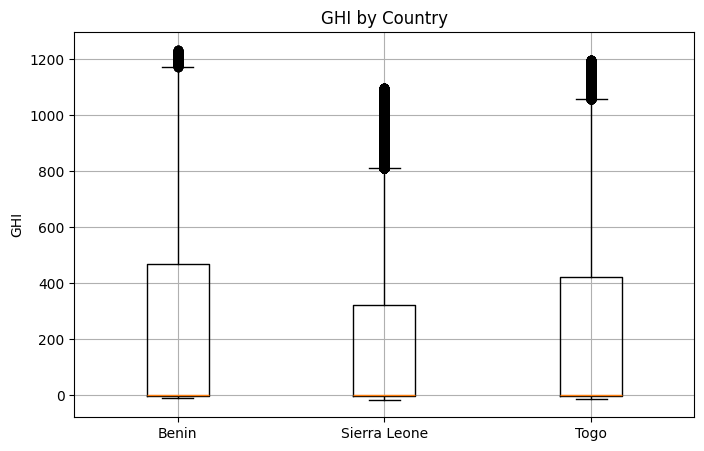

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16496\1562148177.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries)


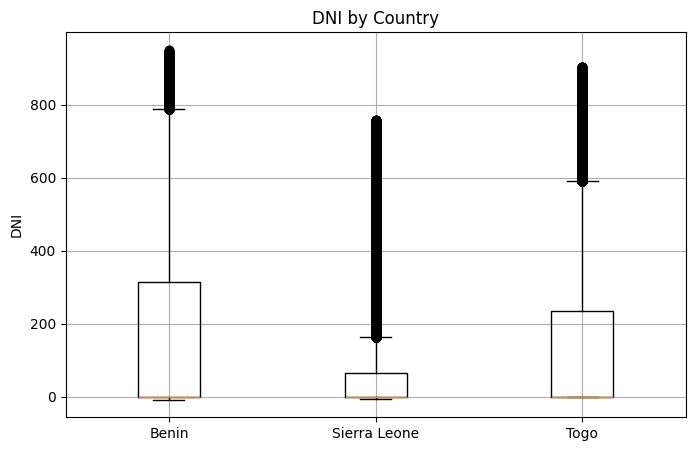

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16496\1562148177.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries)


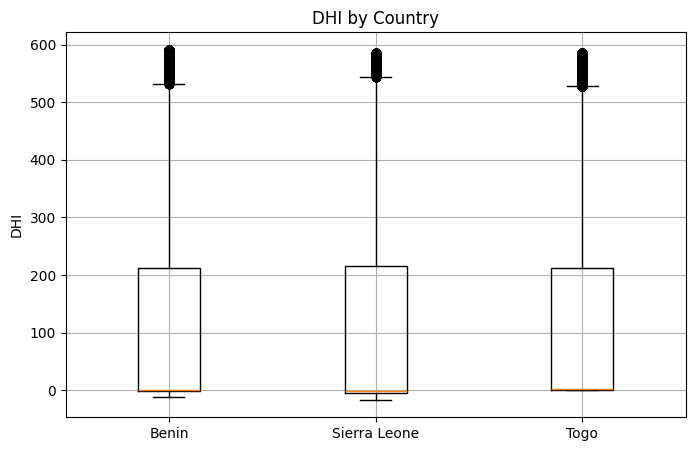

In [4]:
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
countries = ['Benin', 'Sierra Leone', 'Togo']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    
    data_to_plot = [
        df[df['Country'] == country][metric].dropna()
        for country in countries
    ]
    
    plt.boxplot(data_to_plot, labels=countries)
    plt.title(f'{metric} by Country')
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


In [5]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         235.928754    0.6  328.125637  166.661173   -0.1  261.907787   
Sierra Leone  180.424277   -0.5  273.840224  100.699059   -0.1  196.340190   
Togo          223.379506    0.4  316.961929  147.579246    0.0  247.279049   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.540582    0.4  153.033545  
Sierra Leone  106.598984   -0.7  152.670299  
Togo          112.625544    1.4  151.487829

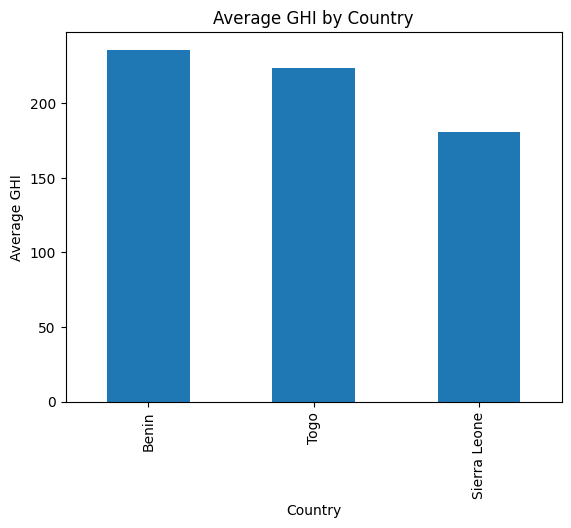

In [6]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', title='Average GHI by Country')
plt.ylabel('Average GHI')
plt.show()
